In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [2]:
#generating dataset

import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("Dataset/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [3]:
import pandas as pd
from sklearn.utils import shuffle

 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
112      1       0       0       0       0       0       0       0       0   
182      1       0       0       0       0       0       0       0       0   
913      9       0       0       0       0       0       0       0       0   
111      1       0       0       0       0       0       0       0       0   
850      8       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
370      3       0       0       0       0       0       0       0       0   
567      5       0       0       0       0       0       0       0       0   
248      2       0       0       0       0       0       0       0       0   
144      1       0       0       0       0       0       0       0       0   
736      7       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [4]:
X = data.drop(["label"],axis=1)
Y= data["label"]

3


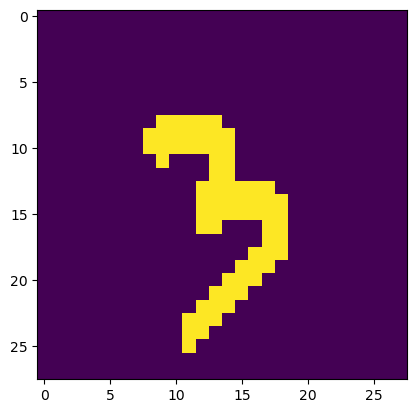

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [6]:
# Split the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [7]:
# Train the SVM model
svm_classifier = SVC(kernel="linear", random_state=6)
svm_classifier.fit(train_x, train_y)

SVC(kernel='linear', random_state=6)

In [8]:
# Save the trained model
joblib.dump(svm_classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [9]:
# Make predictions on the test set
prediction = svm_classifier.predict(test_x)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(test_y, prediction)
print("Accuracy = ", accuracy)

Accuracy =  0.965


In [11]:
# Get the classification report
class_report = classification_report(test_y, prediction)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        20
           3       1.00      0.95      0.97        20
           4       0.84      0.94      0.89        17
           5       0.95      0.91      0.93        22
           6       0.94      1.00      0.97        16
           7       0.96      1.00      0.98        25
           8       1.00      0.92      0.96        24
           9       1.00      1.00      1.00        17

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



<Figure size 1000x600 with 0 Axes>

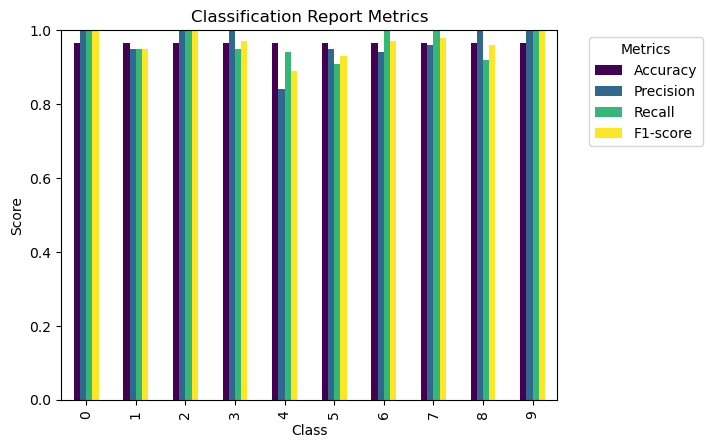

In [12]:
# Parse classification report values
report_lines = class_report.split('\n')[2:-5]
class_labels = []
precision = []
recall = []
f1_score = []
for line in report_lines:
    row = line.split()
    class_labels.append(row[0])
    precision.append(float(row[1]))
    recall.append(float(row[2]))
    f1_score.append(float(row[3]))

# Create a DataFrame from the classification report data
report_data = {
    'Class': class_labels,
    'Accuracy': [accuracy] * len(class_labels),
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
}

df = pd.DataFrame(report_data)

# Set the 'Class' column as the index for easier plotting
df = df.set_index('Class')

# Plot the bar chart
plt.figure(figsize=(10, 6))
df.plot(kind='bar', colormap='viridis')
plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set the y-axis limit to show scores between 0 and 1
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

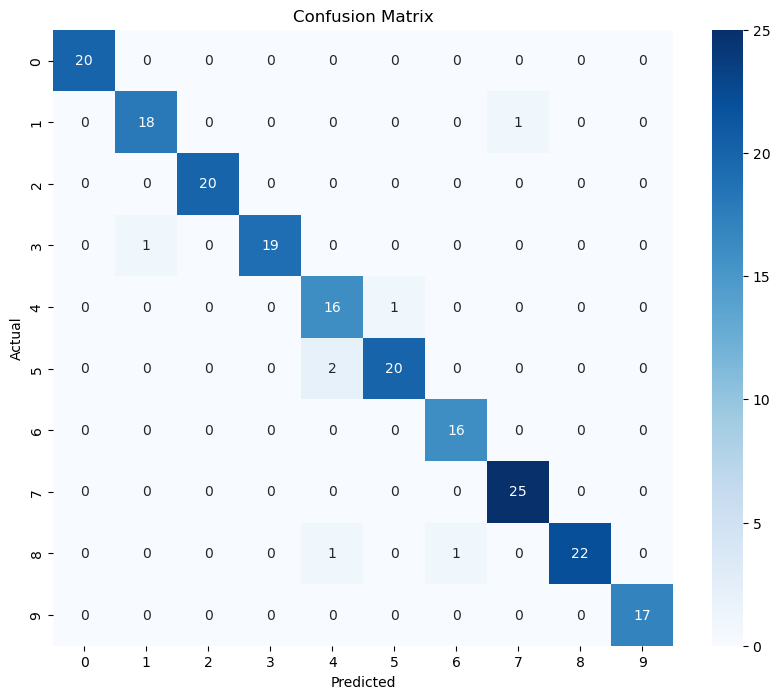

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# Make predictions on the test set
prediction = svm_classifier.predict(test_x)

# Calculate the confusion matrix
cm = confusion_matrix(test_y, prediction)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

# Load the trained model
model = joblib.load("model/digit_recognizer")

# Function to preprocess the image
def preprocess_image(image):
    im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
    _, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)
    roi = np.array(roi).reshape(1, -1)
    roi = np.array(roi) / 255.0
    return roi

images_folder = "img/"

while True:
    img = ImageGrab.grab(bbox=(0, 161, 680, 685))
    img_np = np.array(img)
    im = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

    # Preprocess the image
    X = preprocess_image(im)

    # Make prediction
    prediction = model.predict(X)[0]
    print("Prediction: ", prediction)

    # Display the prediction on the image
    cv2.putText(im, "The Number is Predicted as: " + str(prediction), (20, 20), 0, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the result
    cv2.imshow("Result", im)

    # Wait for a key press or timeout
    key = cv2.waitKey(10000)  # Change the timeout value to adjust display duration

    # Exit if 'Enter' key is pressed
    if key == 13:
        break

# Close the OpenCV windows
cv2.destroyAllWindows()


C:\Users\emran\anaconda3\envs\HDR\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction:  8


C:\Users\emran\anaconda3\envs\HDR\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction:  8


C:\Users\emran\anaconda3\envs\HDR\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction:  1


C:\Users\emran\anaconda3\envs\HDR\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction:  1


C:\Users\emran\anaconda3\envs\HDR\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction:  1


KeyboardInterrupt: 